# Analise Microdados Enem- 2018

O Exame Nacional do Ensino Médio (Enem) é uma prova de admissão à educação superior realizada pelo Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (INEP), autarquia vinculada ao Ministério da Educação do Brasil, e foi criada em 1998 inicialmente para avaliar a qualidade do ensino médio no país.

In [51]:
import pandas as pd
import matplotlib

In [52]:
#Importação dataset
microdadosEnem = pd.read_csv("dados/enem_2018/DADOS/MICRODADOS_ENEM_2018.csv",sep =';',encoding='ISO-8859-1')


In [53]:
microdadosEnem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180008202043,2018,5300108,Brasília,53,DF,44.0,M,1.0,1,...,A,A,A,A,A,A,A,A,B,A
1,180007197856,2018,2111102,São João dos Patos,21,MA,23.0,F,0.0,3,...,A,B,A,A,B,A,A,A,A,A
2,180008517434,2018,3530607,Mogi das Cruzes,35,SP,23.0,F,0.0,1,...,A,B,A,A,B,B,B,B,A,A
3,180007661228,2018,2916401,Itapetinga,29,BA,26.0,F,0.0,3,...,A,B,B,A,C,A,B,B,A,A
4,180008787987,2018,2918100,Jeremoabo,29,BA,20.0,M,0.0,0,...,A,B,A,A,B,A,B,B,B,A


* Colunas do Dataset.

In [54]:
microdadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

* Colunas que serão utilizadas.

In [55]:
colunasSelecionadas = [
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18',
       'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS',
       'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS',
       'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE',
       'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO',
       'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO',
       'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE',
       'IN_MAQUINA_BRAILE', 'IN_SOROBAN', 'IN_MARCA_PASSO', 'IN_SONDA',
       'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL',
       'IN_SALA_ACOMPANHANTE', 'IN_MOBILIARIO_ESPECIFICO',
       'IN_MATERIAL_ESPECIFICO', 'IN_NOME_SOCIAL']
microdadosEnemSelecionados = microdadosEnem.filter(items = colunasSelecionadas)
microdadosEnemSelecionados

,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,...,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL
0,Brasília,53,DF,44.0,M,1.0,1,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,São João dos Patos,21,MA,23.0,F,0.0,3,1,2111102.0,São João dos Patos,...,0,0,0,0,0,0,0,0,0,0
2,Mogi das Cruzes,35,SP,23.0,F,0.0,1,1,4209300.0,Lages,...,0,0,0,0,0,0,0,0,0,0
3,Itapetinga,29,BA,26.0,F,0.0,3,2,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Jeremoabo,29,BA,20.0,M,0.0,0,1,2800308.0,Aracaju,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513742,Rio de Janeiro,33,RJ,56.0,F,1.0,1,1,3304557.0,Rio de Janeiro,...,0,0,0,0,0,0,0,0,0,0
5513743,Manaus,13,AM,20.0,F,0.0,3,1,1303403.0,Parintins,...,0,0,0,0,0,0,0,0,0,0
5513744,São Paulo,35,SP,17.0,F,0.0,3,1,3529401.0,Mauá,...,0,0,0,0,0,0,0,0,0,0
5513745,Campinas,35,SP,17.0,F,0.0,1,1,3509502.0,Campinas,...,0,0,0,0,0,0,0,0,0,0


* Quantidade de participantes por cidade.

In [56]:
coluna_nome_municipio = microdadosEnemSelecionados['NO_MUNICIPIO_RESIDENCIA']
#numero de participantes por municnipio
coluna_nome_municipio.value_counts().sort_index()

Abadia de Goiás         284
Abadia dos Dourados     176
Abadiânia               344
Abaetetuba             7188
Abaeté                  515
                       ... 
Áurea                    59
Ângulo                   48
Érico Cardoso           138
Óbidos                 1146
Óleo                     48
Name: NO_MUNICIPIO_RESIDENCIA, Length: 5299, dtype: int64

* Número de participante por idade.

In [57]:
coluna_nu_idade = microdadosEnemSelecionados['NU_IDADE']
coluna_nu_idade.value_counts().sort_index()


10.0       6
11.0      11
12.0      40
13.0     272
14.0    5625
        ... 
87.0       2
88.0       1
89.0       1
90.0       1
98.0       1
Name: NU_IDADE, Length: 82, dtype: int64

* Número de participantes por estado

In [58]:
coluna_sg_uf_residencia = microdadosEnemSelecionados['SG_UF_RESIDENCIA']
coluna_sg_uf_residencia.value_counts()

SP    934174
MG    587471
BA    401328
RJ    382078
CE    329406
PE    304302
PA    283861
RS    243555
PR    236533
MA    218462
GO    191029
PB    152049
RN    124039
SC    123933
AM    123755
PI    118350
ES    112173
DF    104531
MT     96762
AL     89670
SE     74633
MS     72319
RO     62266
TO     55145
AP     40109
AC     37785
RR     14029
Name: SG_UF_RESIDENCIA, dtype: int64

---------------------------------------------

# Comparação entre nota redação Enem e o IDHM (Índice de Desenvolvimento Humano Municipal)


-----------------------------------------------------

In [59]:
microdadosEnemCsv=microdadosEnem.filter(items=['CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA','CO_UF_RESIDENCIA','SG_UF_RESIDENCIA',
                                               'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'])

mediaEnemPorMunicipio = microdadosEnemCsv.groupby(['CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA',
                                                    'CO_UF_RESIDENCIA','SG_UF_RESIDENCIA'],as_index=False).mean()

In [60]:
mediaEnemPorMunicipio = pd.read_csv('dados/mediaEnemPorMunicipio.csv',sep=',',index_col = 0)
atlasHumano=pd.read_csv('dados/enem_2018/DADOS/idhm_municipios_2010M2.csv',sep=';')

In [61]:
mediaEnemIDHM =pd.merge(mediaEnemPorMunicipio,atlasHumano,how='left',left_on=['CO_MUNICIPIO_RESIDENCIA'],right_on=['codMunicipio'])

In [62]:
#conversão de object para float
mediaEnemIDHM['IDHM'] = mediaEnemIDHM['IDHM'].apply(lambda x: float(str(x).replace(',','.')))
mediaEnemIDHM['IDHM_R'] = mediaEnemIDHM['IDHM_R'].apply(lambda x: float(str(x).replace(',','.')))
mediaEnemIDHM['IDHM_L'] = mediaEnemIDHM['IDHM_L'].apply(lambda x: float(str(x).replace(',','.')))
mediaEnemIDHM['IDHM_E'] = mediaEnemIDHM['IDHM_E'].apply(lambda x: float(str(x).replace(',','.')))


In [63]:
mean_redacao = mediaEnemIDHM.NU_NOTA_REDACAO.mean()
mean_IDHM = mediaEnemIDHM.IDHM.mean()

In [64]:
#media IDHM e media nota redação
mean_redacao
mean_IDHM

0.6592001078748652

# Na figua abaixo é possivel ver a comparação entre o IDHM e a nota da redaçao do enem sendo dividida em quatro quadrantes.

Quadrante 1: 33.73429084380611%, Baixo IDHM,Baixa nota (Vermelho)
Quadrante 2: 17.378815080789945%, Alto IDHM,Baixa nota (Laranja)
Quadrante 3: 35.09874326750449%, Alto IDHM,alta nota (Azul)
Quadrante 4: 13.644524236983843%, Baixo IDHM,Alta nota (Verde)


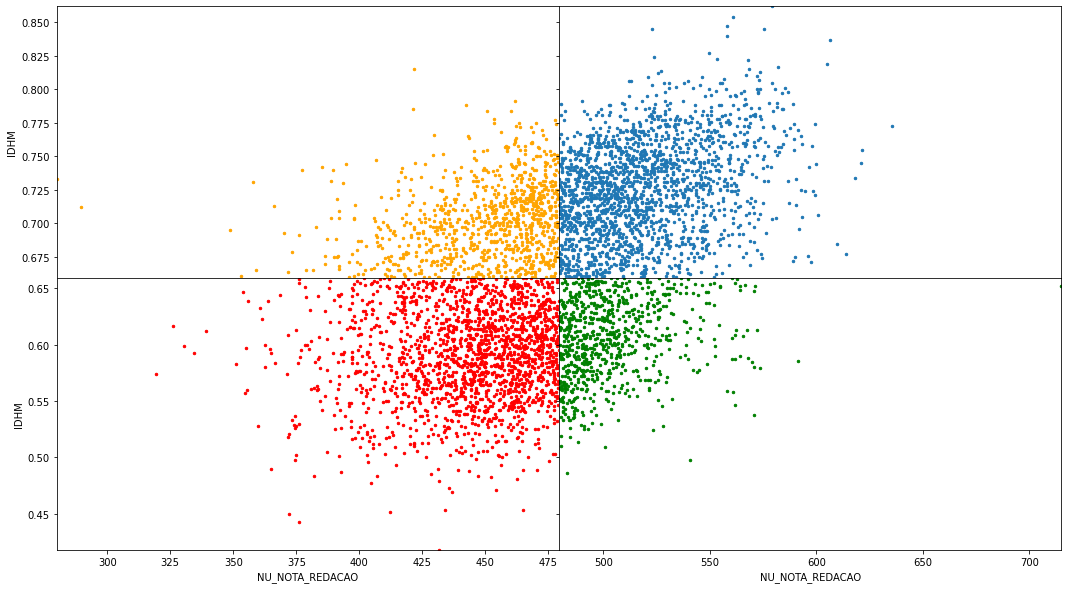

In [65]:
idhmMunicipio = mediaEnemIDHM.IDHM
notaMunicipio = mediaEnemIDHM.NU_NOTA_REDACAO

quadrante1= (idhmMunicipio < mean_IDHM)&(notaMunicipio < mean_redacao)
quadrante2= (idhmMunicipio > mean_IDHM)&(notaMunicipio < mean_redacao)
quadrante3= (idhmMunicipio > mean_IDHM)&(notaMunicipio > mean_redacao)
quadrante4= (idhmMunicipio < mean_IDHM)&(notaMunicipio > mean_redacao)

fig , ax = plt.subplots(2,2,figsize=(18,10),sharex ='col',sharey ='row')
plt.subplots_adjust(wspace = 0,hspace = 0)

minRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.min()
maxRedacao = mediaEnemIDHM.NU_NOTA_REDACAO.max()
minIDHM = mediaEnemIDHM.IDHM.min()
maxIDHM = mediaEnemIDHM.IDHM.max()


mediaEnemIDHM1 = mediaEnemIDHM[quadrante1]
mediaEnemIDHM1.plot.scatter('NU_NOTA_REDACAO','IDHM',color ='red',s=6,ax = ax[1,0], xlim = (minRedacao,mean_redacao), ylim= (minIDHM , mean_IDHM))
print("Quadrante 1: {}%, Baixo IDHM,Baixa nota (Vermelho)".format(100*len(mediaEnemIDHM1.IDHM)/len(idhmMunicipio)))

mediaEnemIDHM2 = mediaEnemIDHM[quadrante2]
mediaEnemIDHM2.plot.scatter('NU_NOTA_REDACAO','IDHM',color ='Orange',s=6,ax = ax[0,0], xlim = (minRedacao,mean_redacao), ylim=(mean_IDHM,maxIDHM))
print("Quadrante 2: {}%, Alto IDHM,Baixa nota (Laranja)".format(100*len(mediaEnemIDHM2.IDHM)/len(idhmMunicipio)))

mediaEnemIDHM3 = mediaEnemIDHM[quadrante3]
mediaEnemIDHM3.plot.scatter('NU_NOTA_REDACAO','IDHM',s=6,ax = ax[0,1], xlim = (mean_redacao,maxRedacao), ylim=( mean_IDHM, maxIDHM ))
print("Quadrante 3: {}%, Alto IDHM,alta nota (Azul)".format(100*len(mediaEnemIDHM3.IDHM)/len(idhmMunicipio)))

mediaEnemIDHM4 = mediaEnemIDHM[quadrante4]
mediaEnemIDHM4.plot.scatter('NU_NOTA_REDACAO','IDHM',color ='green',s=6,ax = ax[1,1], xlim = (mean_redacao,maxRedacao), ylim=( minIDHM , mean_IDHM))
print("Quadrante 4: {}%, Baixo IDHM,Alta nota (Verde)".format(100*len(mediaEnemIDHM4.IDHM)/len(idhmMunicipio)))


------------------------------------------------------------

# Nota media Enem por municipio


--------------------------------------------------------------

In [66]:
#importção novo dataset
municipios = pd.read_csv('dados/enem_2018/DADOS/municipios.csv')
enem_idhm_municipios = pd.merge(mediaEnemIDHM,municipios,
                                how='left',left_on=['CO_MUNICIPIO_RESIDENCIA'],right_on=['codigo_ibge'])
enem_idhm_municipios

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,codMunicipio,...,IDHM,IDHM_R,IDHM_L,IDHM_E,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,1100015,Alta Floresta D'Oeste,11,RO,480.653117,554.668286,504.495652,519.142005,460.051151,1100015,...,0.641,0.657,0.763,0.526,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11
1,1100023,Ariquemes,11,RO,476.134097,549.811621,508.440787,508.070983,448.096330,1100023,...,0.702,0.716,0.806,0.600,1100023,Ariquemes,-9.90571,-63.0325,0,11
2,1100031,Cabixi,11,RO,468.973846,546.226389,493.195833,505.800000,445.277778,1100031,...,0.650,0.650,0.757,0.559,1100031,Cabixi,-13.49450,-60.5520,0,11
3,1100049,Cacoal,11,RO,484.373259,559.568811,518.981172,522.344497,471.500169,1100049,...,0.718,0.727,0.821,0.620,1100049,Cacoal,-11.43430,-61.4562,0,11
4,1100056,Cerejeiras,11,RO,477.077656,556.285172,511.496552,507.730037,459.310345,1100056,...,0.692,0.688,0.799,0.602,1100056,Cerejeiras,-13.18700,-60.8168,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,52,GO,493.409052,552.642259,517.681172,525.894397,480.083682,5222005,...,0.712,0.710,0.818,0.622,5222005,Vianópolis,-16.74050,-48.5159,0,52
5566,5222054,Vicentinópolis,52,GO,469.161429,523.104819,487.281928,506.642857,419.277108,5222054,...,0.684,0.707,0.804,0.562,5222054,Vicentinópolis,-17.73220,-49.8047,0,52
5567,5222203,Vila Boa,52,GO,459.281250,517.789474,466.771053,494.637500,353.684211,5222203,...,0.647,0.619,0.818,0.534,5222203,Vila Boa,-15.03870,-47.0520,0,52
5568,5222302,Vila Propício,52,GO,455.734694,513.081905,473.814286,476.962245,392.380952,5222302,...,0.634,0.629,0.802,0.505,5222302,Vila Propício,-15.45420,-48.8819,0,52


## As figuras a seguir mostram a nota media do enem em todas as matérias da prova por municipio, usando a longitude e latitude para mostrar a localização do municipio no mapa. 

Nota media Redação Enem por municipio


<AxesSubplot:title={'center':'Nota Media Redação por municipio'}, xlabel='longitude', ylabel='latitude'>

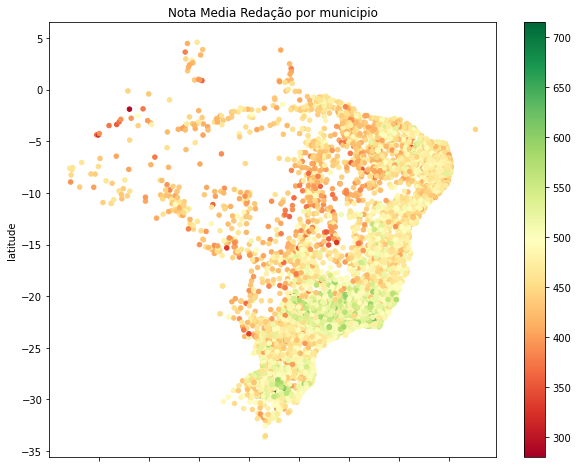

In [67]:
print("Nota media Redação Enem por municipio")
enem_idhm_municipios.plot.scatter(y='latitude',x='longitude',
                                  c=enem_idhm_municipios['NU_NOTA_REDACAO'],
                                  cmap='RdYlGn',
                                  figsize=(10,8),
                                 title ="Nota Media Redação por municipio")

Nota media Enem por municipio


<AxesSubplot:title={'center':'Nota Matemática'}, xlabel='longitude', ylabel='latitude'>

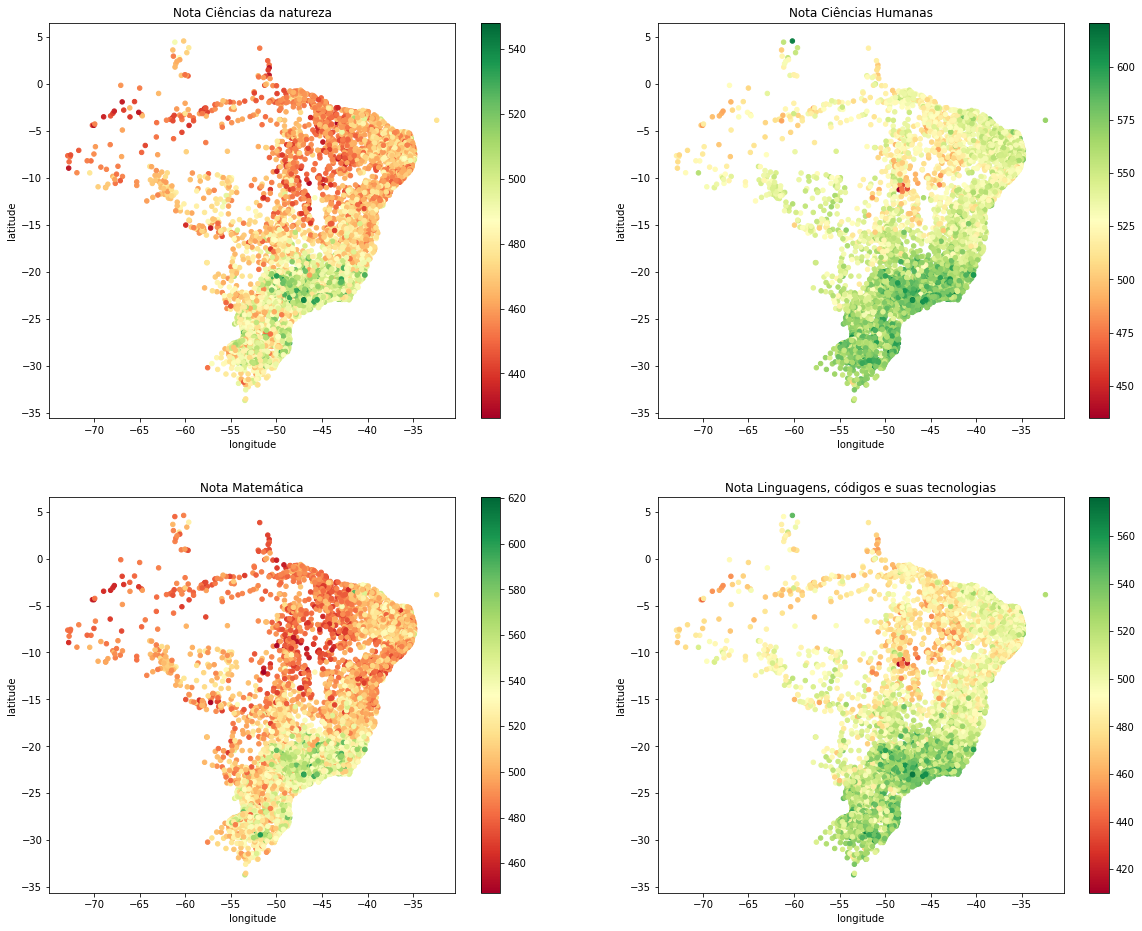

In [68]:
fig,ax = plt.subplots(2,2, figsize=(20,16))

print("Nota media Enem por municipio")



enem_idhm_municipios.plot.scatter(y='latitude',x='longitude',
                                  c=enem_idhm_municipios['NU_NOTA_CN'],
                                  cmap='RdYlGn',
                                 title ="Nota Ciências da natureza",ax=ax[0,0])


enem_idhm_municipios.plot.scatter(y='latitude',x='longitude',
                                  c=enem_idhm_municipios['NU_NOTA_CH'],
                                  cmap='RdYlGn',
                                 title ="Nota Ciências Humanas",ax=ax[0,1])

enem_idhm_municipios.plot.scatter(y='latitude',x='longitude',
                                  c=enem_idhm_municipios['NU_NOTA_LC'],
                                  cmap='RdYlGn',
                                 title ="Nota Linguagens, códigos e suas tecnologias",ax=ax[1,1])

enem_idhm_municipios.plot.scatter(y='latitude',x='longitude',
                                  c=enem_idhm_municipios['NU_NOTA_MT'],
                                  cmap='RdYlGn',
                                 title ="Nota Matemática",ax=ax[1,0])

--------------------------------------

# Quebra de dados em conjunto de treino e conjunto de teste;


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
coluna_machine = ['NU_NOTA_REDACAO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']
coluna_machine_P = enem_idhm_municipios.filter(items = coluna_machine)

In [71]:

X = coluna_machine_P.drop(columns='NU_NOTA_REDACAO')
y = coluna_machine_P['NU_NOTA_REDACAO']
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

(5570, 4) (5570,)


In [72]:
print(f"Tamanho de X_train: {X_train.shape}")
print(f"Tamanho de X_test: {X_test.shape}")
print(f"Tamanho de y_train: {y_train.shape}")
print(f"Tamanho de y_test: {y_test.shape}")

Tamanho de X_train: (3899, 4)
Tamanho de X_test: (1671, 4)
Tamanho de y_train: (3899,)
Tamanho de y_test: (1671,)


# Treina um estimador do scikit-learn de aprendizagem supervisionada regressor no conjunto de treino;


In [73]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [74]:
clf.fit(X_train, y_train)

LinearRegression()

# Verifica o desempenho do estimador do scikit-learn no conjunto de teste

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = clf.predict(X_test)

print(f"Acurácia de Teste: ±{mean_absolute_error(y_test, y_pred):1.0f}")

Acurácia de Teste: ±19
